In [2]:
from utils import *

In [2]:
# import data
snakemake_contigs = SeqIO.to_dict(SeqIO.parse('../data/contigs/contigs_non_cellular_filtered.fasta', "fasta"))

# extract contig names and lengths
df = pd.DataFrame({
    'contig_name': list(snakemake_contigs.keys()),
    'contig_length': [len(str(record.seq)) for record in snakemake_contigs.values()]
})

# extract contig lengths as a list
sample = df['contig_length'].to_list()

Fit a curve to contig_length distribution

[630.08666667 678.26       726.43333333] [0.00138389 0.00138389 0.00089546]
[ 8.22319112e-03  3.08986477e-03 -1.93895916e-08  1.63621529e-04]
range(600, 603) [0.00143992 0.00143593 0.00143195]
range(7998, 8001) [8.54357524e-06 8.52418564e-06 8.50479605e-06]
y_fitted: [0.00143992 0.00143593 0.00143195] [8.54357524e-06 8.52418564e-06 8.50479605e-06]
sum: 1.0113724538511488
y_fitted: [0.00142373 0.00141978 0.00141585] [8.44750636e-06 8.42833480e-06 8.40916323e-06]
sum: 0.999999999999994


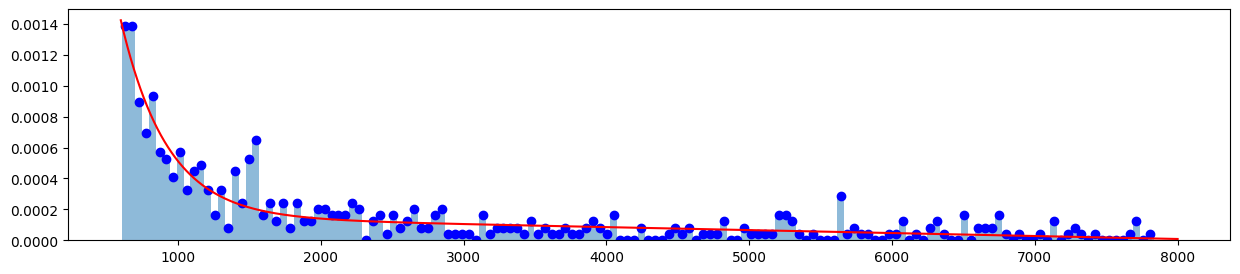

In [3]:
# bin the data
bins = 150
ydata, bin_edges = np.histogram(sample, bins=bins, density=True)
xdata = 0.5 * (bin_edges[1:] + bin_edges[:-1])
print(xdata[:3], ydata[:3])

# fit function to binned data
def func2(x, a, b, c, d):
    return a * np.exp(-b * x) + c*x + d

p0 = [4, 0.002, -0.0001, 0.001]  # initial guess for parameters
popt, pcov = curve_fit(func2, xdata, ydata, p0=p0, maxfev=10000)
print(popt)

# fit to needed range
xfine = range(600, 8000+1)
y_fitted = func2(xfine, *popt)  # popt[0], popt[1], popt[2])

# xfine and y-fitted to be used for weighted sampling
print(xfine[:3], y_fitted[:3])
print(xfine[-3:], y_fitted[-3:])

print('y_fitted:', y_fitted[:3], y_fitted[-3:])
print('sum:', sum(y_fitted))

# make sure it sums to 1.0
y_fitted /= sum(y_fitted)
print('y_fitted:', y_fitted[:3], y_fitted[-3:])
print('sum:', sum(y_fitted))

# plot the data
plt.figure(figsize=(15, 3))
plt.hist(sample, bins=bins, density=True, alpha=0.5)
plt.plot(xdata, ydata, 'bo')

# plot the fitted function
plt.plot(xfine, y_fitted, 'r-')

# Create a dictionary from two equally long lists: xfine and y_fitted
xy_dict = dict(zip(xfine, y_fitted))

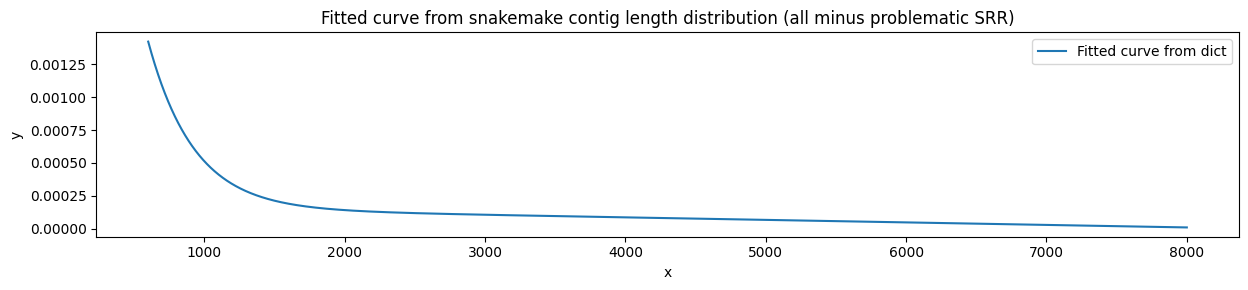

In [4]:
# Plot the dictionary: keys as x, values as y
fig, ax = plt.subplots(figsize=(12.5, 3))
ax.plot(list(xy_dict.keys()), list(xy_dict.values()), label='Fitted curve from dict')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted curve from snakemake contig length distribution (all minus problematic SRR)')
plt.legend()
plt.tight_layout()
plt.show()

export dictionary of frequences for sampling

In [5]:
os.makedirs('results/training/sampling', exist_ok=True)
mpu.io.write('results/training/sampling/fitted_curve_lens_freq.json', xy_dict) # use this for sampling

{600: 0.001423730589728671,
 601: 0.0014197826968726146,
 602: 0.00141584692449912,
 603: 0.0014119232352153349,
 604: 0.0014080115917437664,
 605: 0.001404111956921927,
 606: 0.0014002242937019786,
 607: 0.0013963485651503793,
 608: 0.0013924847344475317,
 609: 0.001388632764887428,
 610: 0.001384792619877305,
 611: 0.0013809642629372893,
 612: 0.0013771476577000526,
 613: 0.0013733427679104636,
 614: 0.0013695495574252395,
 615: 0.001365767990212606,
 616: 0.0013619980303519478,
 617: 0.0013582396420334694,
 618: 0.001354492789557852,
 619: 0.0013507574373359116,
 620: 0.0013470335498882615,
 621: 0.0013433210918449717,
 622: 0.0013396200279452313,
 623: 0.001335930323037014,
 624: 0.0013322519420767391,
 625: 0.0013285848501289395,
 626: 0.0013249290123659278,
 627: 0.0013212843940674623,
 628: 0.001317650960620418,
 629: 0.001314028677518453,
 630: 0.001310417510361682,
 631: 0.0013068174248563468,
 632: 0.0013032283868144876,
 633: 0.0012996503621536186,
 634: 0.001296083316896401

### Checkup after sampling step

- 00_sample_refs.py results in sampled contigs of reference genomes. 
- compare the curve used for sampling and a curve fitted to the contig length distribution after reference genomes sampling

In [8]:
# import sampled contigs
sampled_contigs = SeqIO.to_dict(SeqIO.parse('/home/tobamo/analize/model-tobamo/notebooks/MODEL4/results/training/sampling/2025-06-11_sampled_contigs_30.fasta', "fasta"))

# extract contig names and lengths
df = pd.DataFrame({
    'contig_name': list(sampled_contigs.keys()),
    'contig_length': [len(str(record.seq)) for record in sampled_contigs.values()]
})

new_sample = df['contig_length'].to_list()

[622.08666667 666.26       710.43333333] [0.0013281  0.00105041 0.00117718]
[ 6.28313380e-03  2.71071601e-03 -2.26595131e-08  1.70843730e-04]


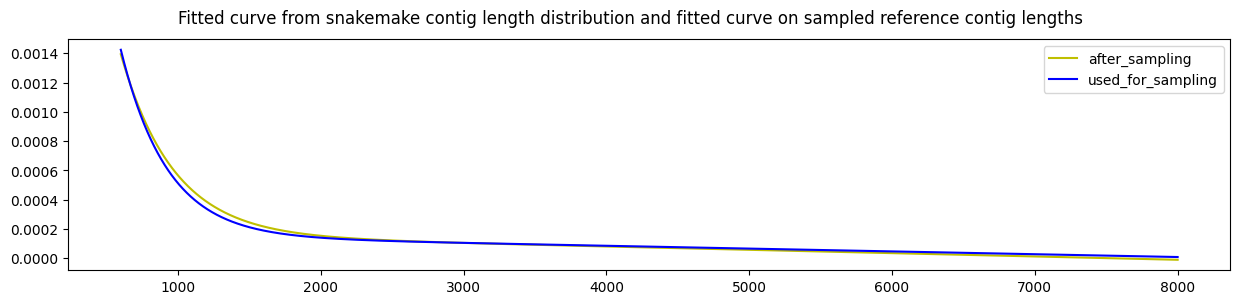

In [9]:
# bin the data
bins = 150
ydata, bin_edges = np.histogram(new_sample, bins=bins, density=True)
xdata = 0.5 * (bin_edges[1:] + bin_edges[:-1])
print(xdata[:3], ydata[:3])

# fit function to binned data
def func2(x, a, b, c, d):
    return a * np.exp(-b * x) + c*x + d

p0 = [7.93139545e-03, 3.05621468e-03, -1.81668155e-08, 1.58731686e-04]  # initial guess for parameters
popt, pcov = curve_fit(func2, xdata, ydata, p0=p0, maxfev=10000)
print(popt)

# fit to needed range
xfine = range(600, 8000+1)
sample_y_fitted = func2(xfine, *popt)  # popt[0], popt[1], popt[2])
# make sure it sums to 1.0
sample_y_fitted /= sum(sample_y_fitted)

# plot the data
plt.figure(figsize=(15, 3))

# plot the fitted function
plt.plot(xfine, sample_y_fitted, 'y-', label='after_sampling')
plt.plot(xfine, y_fitted, 'b-', label='used_for_sampling')
plt.suptitle('Fitted curve from snakemake contig length distribution and fitted curve on sampled reference contig lengths')
plt.legend()
plt.show()